# Assignment 1: Neural Networks
Yanxi Li, yli130@kent.edu

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
import matplotlib.pyplot as plt # for figure plot

In [3]:
len(train_data)  # comments in training data set

25000

In [4]:
len(train_data[1]) # check the length of first comment in training data

189

In [5]:
max_len = max([len(i) for i in train_data]) #check max length in each list in the training data
max_len

2494

In [6]:
max([max(sequence) for sequence in train_data])  # check the maxmium number in the list

9999

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[1] # result for the multi-hot encoding for index 1

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
x_train.shape, x_test.shape  # show both train_test data set shape

((25000, 10000), (25000, 10000))

In [10]:
len(x_train[0])  # check the length for the first sample in training data set

10000

In [4]:
y_train = np.asarray(train_labels).astype("float32")  # convert both train & test lables into floats
y_test = np.asarray(test_labels).astype("float32")

In [12]:
type(x_train), type(y_train) #check data format in training data set

(numpy.ndarray, numpy.ndarray)

In [13]:
y_train.shape, y_test.shape  # check train and test label shape

((25000,), (25000,))

### Original model

#### Build the model

In [5]:
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Settingt the validation set
x_val = x_train[:10000]             # validation for the first 10000 data in training set
partial_x_train = x_train[10000:]      # trainig data for the rest of data which is 25000-10000=15000
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,     # run the model for 20 epoch and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5497 - accuracy: 0.7778 - val_loss: 0.4259 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3458 - accuracy: 0.8992 - val_loss: 0.3439 - val_accuracy: 0.8668
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2524 - accuracy: 0.9224 - val_loss: 0.2913 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1966 - accuracy: 0.9373 - val_loss: 0.2869 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1635 - accuracy: 0.9473 - val_loss: 0.2824 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1344 - accuracy: 0.9595 - val_loss: 0.2829 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1156 - accuracy: 0.9658 - val_loss: 0.2958 - val_accuracy: 0.8837
Epoch 8/20
30

In [6]:
history_dict = history.history
history_dict.keys()  # show key names in the dictionary

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

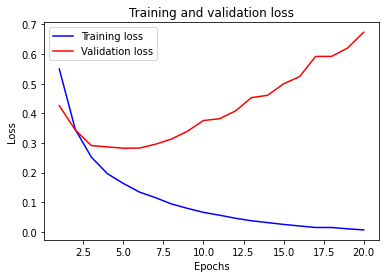

In [7]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

From the loss pattern in training & validation, the validation loss **starts to increase** around 4 epochs, the **original model choose the 4 epochs** to retrain the model using the testing data.

#### Retraining a model from scratch

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)  # change to 4 epochs
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4621 - accuracy: 0.8190
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2676 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2040 - accuracy: 0.9261
Epoch 4/4
782/782 [==============================] - 1s 573us/step - loss: 0.2900 - accuracy: 0.8840


In [21]:
results

[0.29001015424728394, 0.8840000033378601]

The original model **test data prediction** result: **loss: 0.2926, accuracy: 0.8840**.

## Question 1: Change to three hidden layers

In [18]:
# Build the model with 3 layers
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3_layers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history_3_layers = model_3_layers.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,     # run the model for 20 epoch and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5298 - accuracy: 0.7732 - val_loss: 0.3966 - val_accuracy: 0.8613
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3064 - accuracy: 0.9027 - val_loss: 0.3038 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2173 - accuracy: 0.9287 - val_loss: 0.3364 - val_accuracy: 0.8625
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1714 - accuracy: 0.9434 - val_loss: 0.2753 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1416 - accuracy: 0.9526 - val_loss: 0.2970 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1171 - accuracy: 0.9625 - val_loss: 0.3157 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0951 - accuracy: 0.9706 - val_loss: 0.3732 - val_accuracy: 0.8660
Epoch 8/20
30

#### Train & Validation loss

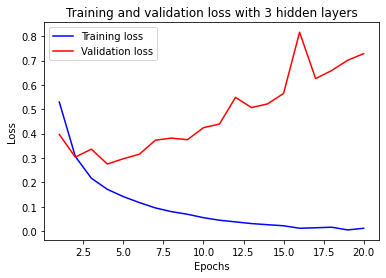

In [19]:
history_dict_3layers = history_3_layers.history
loss_values = history_dict_3layers["loss"]
val_loss_values = history_dict_3layers["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss with 3 hidden layers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The 3 hiddel layer model still need to **choose 4 epochs** to run the test data.

#### Test accuracy

In [20]:
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3_layers.fit(x_train, y_train, epochs=4, batch_size=512)  # change to 4 epochs
results_3_layers = model_3_layers.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.4586 - accuracy: 0.8158 0s - loss: 0.5132 - accuracy
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2501 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1936 - accuracy: 0.9316
Epoch 4/4
782/782 [==============================] - 1s 615us/step - loss: 0.3106 - accuracy: 0.8806


In [22]:
results_3_layers

[0.31061962246894836, 0.8805999755859375]

The 3 hidden layers model test data prediction result: **loss: 0.3108, accuracy: 0.8805**.

#### Validation accuracy & loss comparison

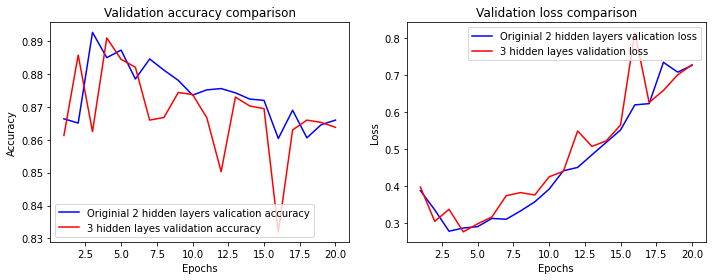

In [23]:
#plt.rcParams['figure.dpi'] = 300
history_dict_3layer = history_3_layers.history
val_acc_3_layers = history_dict_3layer['val_accuracy']
val_acc = history_dict['val_accuracy']

val_loss_3_layers = history_dict_3layer['val_loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(val_acc)+1)

plt.figure(figsize=(10,4)) # set the figure size

plt.subplot(1, 2, 1)  # row, column, index
plt.plot(epochs, val_acc, "b", label="Originial 2 hidden layers valication accuracy")
plt.plot(epochs, val_acc_3_layers, "r", label="3 hidden layes validation accuracy")
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(epochs, val_loss, "b", label="Originial 2 hidden layers valication loss")
plt.plot(epochs, val_loss_3_layers, "r", label="3 hidden layes validation loss")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout() # minimize the overlap of the two figures
plt.show()

### Summary for Question 1:

Similarly, 4 epoch is also appropriate for the 3 hidden layers to **minimize the loss function as well as avoid overfit**. Validation accuracy in both models(2&3 hidden layers) are **close to each other**. As for the 4 epoch, 3 hidden layers **accuracy is even lower** than the original 2 hidden layers

Model with 3 hidden layers test accuracy is 0.8805, while the original model with 2 hidden layers test accuracy is 0.0.8840. Increasing the number of hidden layers from 2 to 3 even **lower the test accuracy**.

## Question 2: 32 units with 2 hidden layers

In [8]:
# Build the model with 32units and 2 layers
model_32units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_32units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history_32units = model_32units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,     # run the model for 20 epochs and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 42ms/step - loss: 0.4974 - accuracy: 0.7850 - val_loss: 0.3971 - val_accuracy: 0.8410
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2802 - accuracy: 0.9047 - val_loss: 0.2906 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2055 - accuracy: 0.9273 - val_loss: 0.2813 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1597 - accuracy: 0.9462 - val_loss: 0.2829 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1283 - accuracy: 0.9569 - val_loss: 0.2932 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1030 - accuracy: 0.9672 - val_loss: 0.3135 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0832 - accuracy: 0.9737 - val_loss: 0.3742 - val_accuracy: 0.8754
Epoch 8/20
30

#### Train & Validation loss

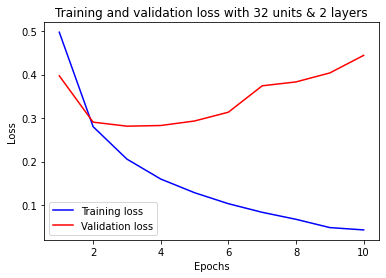

In [9]:
history_dict_32units = history_32units.history

loss_values = history_dict_32units['loss'][:10]  # select 10 epoch could be easier to detect the suitable epoch.
val_loss_values = history_dict_32units['val_loss'][:10]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss with 32 units & 2 layers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

For the 32 units with 2 layers, I choose **3 epochs** to run the test data.

#### Test accuracy

In [10]:
model_32units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_32units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_32units.fit(x_train, y_train, epochs=3, batch_size=512)  # change to 3 epochs
results_32units = model_32units.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 25ms/step - loss: 0.4352 - accuracy: 0.8206
Epoch 2/3
49/49 [==============================] - 1s 17ms/step - loss: 0.2392 - accuracy: 0.9138
Epoch 3/3
782/782 [==============================] - 1s 706us/step - loss: 0.2894 - accuracy: 0.8851


In [11]:
results_32units

[0.2894221544265747, 0.8850799798965454]

The 32 units with 2 layers model test data prediction result: **loss: 0.2894, accuracy: 0.8850.**

#### Validation accuracy & loss comparison

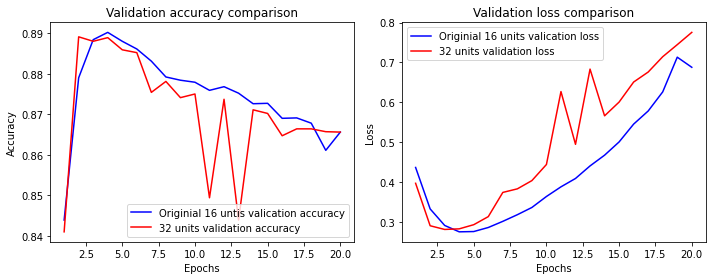

In [12]:
val_acc_32units = history_dict_32units['val_accuracy']
val_acc = history_dict['val_accuracy']  

val_loss_32units = history_dict_32units['val_loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(val_acc_32units)+1)

plt.figure(figsize=(10,4)) # set the figure size

plt.subplot(1, 2, 1)  # row, column, index
plt.plot(epochs, val_acc, "b", label="Originial 16 untis valication accuracy")
plt.plot(epochs, val_acc_32units, "r", label="32 units validation accuracy")
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(epochs, val_loss, "b", label="Originial 16 units valication loss")
plt.plot(epochs, val_loss_32units, "r", label="32 units validation loss")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout() # minimize the overlap of the two figures
plt.show()

### Summary for Question 2:

3 epoch is appropriate for the 32 units with 2 layers to **minimize the loss function as well as avoid overfit**. **Validation accuracy in 32 units is lower** than the original model, and from the validatio loss, **32units begins overfit ealier** than the original 16units model.

Model with **32 units test accuracy is 0.8850**, while the original model with **16 units test accuracy is 0.8840**. Changing the number of units from 16 to 32 **increase the test accuracy.**

## Question 3: Using MSE loss function

In [13]:
# Build the model with 16units and 2 layers
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_mse.compile(optimizer="rmsprop",
              loss="MSE",
              metrics=["accuracy"])

# Train the model
history_mse = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,     # run the model for 20 epochs and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.1650 - accuracy: 0.7911 - val_loss: 0.1150 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0873 - accuracy: 0.9063 - val_loss: 0.0959 - val_accuracy: 0.8818
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0629 - accuracy: 0.9313 - val_loss: 0.0852 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0497 - accuracy: 0.9457 - val_loss: 0.0877 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0396 - accuracy: 0.9599 - val_loss: 0.0865 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0330 - accuracy: 0.9679 - val_loss: 0.0866 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0276 - accuracy: 0.9729 - val_loss: 0.0879 - val_accuracy: 0.8818
Epoch 8/20
30

#### Train & Validation loss

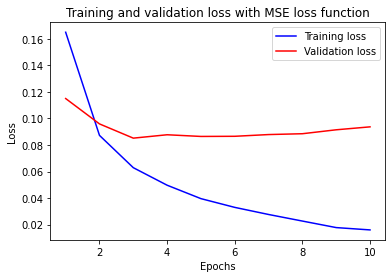

In [14]:
history_dict_mse = history_mse.history

loss_values = history_dict_mse['loss'][:10]  # select 10 epoch could be easier to detect the suitable epoch.
val_loss_values = history_dict_mse['val_loss'][:10]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss with MSE loss function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The MSE loss function model still need to choose **4 epochs** to run the test data. But we **cannot tell any increase from the validation loss** curve.

#### Test accuracy

In [15]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="MSE",
              metrics=["accuracy"])
model_mse.fit(x_train, y_train, epochs=4, batch_size=512)  # change to 3 epochs
results_mse = model_mse.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.1477 - accuracy: 0.8126
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0777 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0586 - accuracy: 0.9310
Epoch 4/4
782/782 [==============================] - 1s 679us/step - loss: 0.0889 - accuracy: 0.8804


In [16]:
results_mse

[0.08892610669136047, 0.8804000020027161]

The MSE loss function model test data prediction result: **loss: 0.089, accuracy: 0.8804**.

#### Validation accuracy & loss comparison

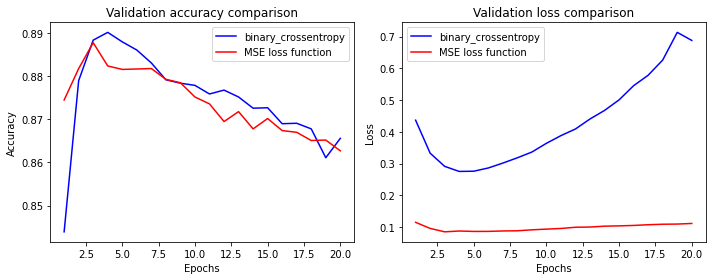

In [17]:
val_acc_mse = history_dict_mse['val_accuracy']
val_acc = history_dict['val_accuracy']  

val_loss_mse = history_dict_mse['val_loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(val_acc_mse)+1)

plt.figure(figsize=(10,4)) # set the figure size

plt.subplot(1, 2, 1)  # row, column, index
plt.plot(epochs, val_acc, "b", label="binary_crossentropy")
plt.plot(epochs, val_acc_mse, "r", label="MSE loss function")
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(epochs, val_loss, "b", label="binary_crossentropy")
plt.plot(epochs, val_loss_mse, "r", label="MSE loss function")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout() # minimize the overlap of the two figures
plt.show()

### Summary for Question 3:

Although the **loss function MSE doesnot change much in test data loss and accuracy as well as validation data accuracy**, the validation loss figure shows that the **MSE loss doesnot change with the epochs increasing**. MSE loss function **should not be used** in this condition.

#### Distinguish binary_crossentropy & MSE

Loss function **binary_crossentropy** is a loss function that is often used for **binary classification** problems, where the output is a probability distribution over a set of classes.Cross entropy loss function penalizes the neural network for assigning low probabilities to the correct class and high probabilities to the wrong classes.\
MSE, **mean squared error**, is often used for **regression** problems, where the output is a continuous value or a vector of values. MSE penalizes the neural network for deviating from the true output by squaring the difference between them.

## Question 4: Using tanh activation

In [8]:
# Build the model with 16 units and 2 layers
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,     # run the model for 10 epochs and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 35ms/step - loss: 0.4712 - accuracy: 0.7972 - val_loss: 0.3415 - val_accuracy: 0.8754
Epoch 2/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2634 - accuracy: 0.9083 - val_loss: 0.2859 - val_accuracy: 0.8854
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 0.1854 - accuracy: 0.9377 - val_loss: 0.2685 - val_accuracy: 0.8904
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1444 - accuracy: 0.9485 - val_loss: 0.2849 - val_accuracy: 0.8872
Epoch 5/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1129 - accuracy: 0.9617 - val_loss: 0.3089 - val_accuracy: 0.8836
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0828 - accuracy: 0.9735 - val_loss: 0.4691 - val_accuracy: 0.8535
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0661 - accuracy: 0.9786 - val_loss: 0.3976 - val_accuracy: 0.8730
Epoch 8/10
30

#### Train & validation loss

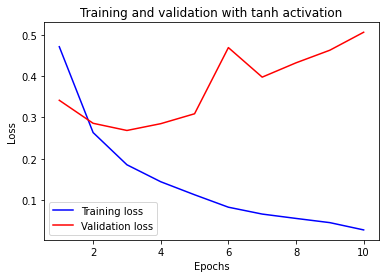

In [9]:
history_dict_tanh = history_tanh.history

loss_values = history_dict_tanh['loss'][:10]  # select 10 epoch could be easier to detect the suitable epoch.
val_loss_values = history_dict_tanh['val_loss'][:10]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation with tanh activation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

For the tanh activation model with 16 units and 2 layers, I choose **3 epochs** to run the test data.

#### Test accuracy

In [10]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512)  # change to 3 epochs
results_tanh = model_tanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 21ms/step - loss: 0.4226 - accuracy: 0.8226
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.2289 - accuracy: 0.9153
Epoch 3/3
782/782 [==============================] - 1s 620us/step - loss: 0.3003 - accuracy: 0.8820


In [11]:
results_tanh

[0.3002675473690033, 0.8819599747657776]

The tanh activation model test data prediction result: **loss: 0.30626, accuracy: 0.8820.**

#### Validation accuracy & loss comparison

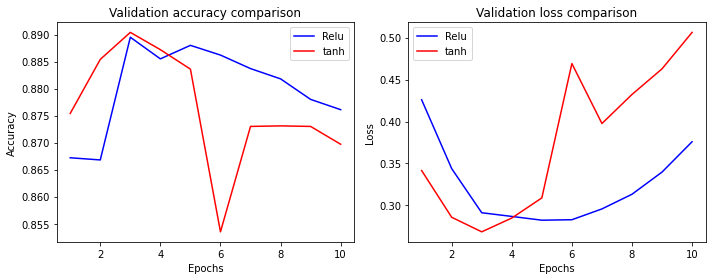

In [13]:
val_acc_tanh = history_dict_tanh['val_accuracy']
val_acc = history_dict['val_accuracy'][:10]  

val_loss_tanh = history_dict_tanh['val_loss']
val_loss = history_dict['val_loss'][:10]

epochs = range(1, len(val_acc_tanh)+1)

plt.figure(figsize=(10,4)) # set the figure size

plt.subplot(1, 2, 1)  # row, column, index
plt.plot(epochs, val_acc, "b", label="Relu")
plt.plot(epochs, val_acc_tanh, "r", label="tanh")
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(epochs, val_loss, "b", label="Relu")
plt.plot(epochs, val_loss_tanh, "r", label="tanh")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout() # minimize the overlap of the two figures
plt.show()

### Summary for Question 4:

The validation accuracy **doesnot change too much** comparing the 2 activation. As for the validation loss, **tanh activation become overfit earlier than Relu.**

Tanh activation model test accuracy is **lower than** the original Relu model.

#### ReLu and Tanh activation

Relu, Rectified linear unit, **output the input for positive values, and 0 otherwise**.\
Relu is the best and most advanced activation function in deep learning right now because it removes the **vanishing gradient problem** and also computationally less expensive compared to the other activation function like sigmoid and tanh.

## Question 5_1: Using regularization to improve model

In [14]:
from tensorflow.keras import regularizers

In [15]:
# Build the model with regularization
model_regu = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"), # use L2 regularization
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_regu.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history_regu = model_regu.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,     # run the model for 20 epochs and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 38ms/step - loss: 0.6240 - accuracy: 0.7784 - val_loss: 0.4972 - val_accuracy: 0.8612
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 0.4267 - accuracy: 0.8882 - val_loss: 0.4089 - val_accuracy: 0.8779
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 0.3500 - accuracy: 0.9099 - val_loss: 0.3747 - val_accuracy: 0.8870
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.3145 - accuracy: 0.9195 - val_loss: 0.3635 - val_accuracy: 0.8875
Epoch 5/10
30/30 [==============================] - 1s 25ms/step - loss: 0.2926 - accuracy: 0.9257 - val_loss: 0.3605 - val_accuracy: 0.8875
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.2791 - accuracy: 0.9310 - val_loss: 0.3617 - val_accuracy: 0.8843
Epoch 7/10
30/30 [==============================] - 1s 27ms/step - loss: 0.2704 - accuracy: 0.9336 - val_loss: 0.3663 - val_accuracy: 0.8821
Epoch 8/10
30

In [16]:
history_dict_regu = history_regu.history

#### Comparing the validation accuracy & loss

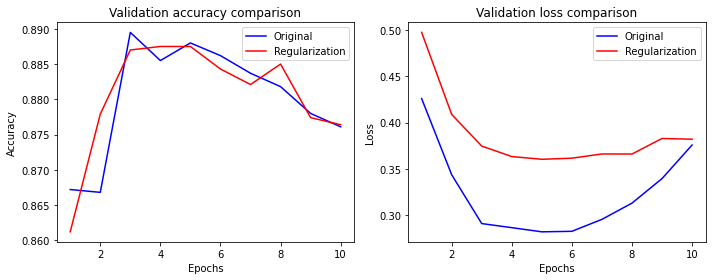

In [17]:
val_acc_regu = history_dict_regu['val_accuracy']
val_acc = history_dict['val_accuracy'][:10]  

val_loss_regu = history_dict_regu['val_loss']
val_loss = history_dict['val_loss'][:10]  

epochs = range(1, len(val_acc_regu)+1)

plt.figure(figsize=(10,4)) # set the figure size

plt.subplot(1, 2, 1)  # row, column, index
plt.plot(epochs, val_acc, "b", label="Original")
plt.plot(epochs, val_acc_regu, "r", label="Regularization")
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(epochs, val_loss, "b", label="Original")
plt.plot(epochs, val_loss_regu, "r", label="Regularization")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout() # minimize the overlap of the two figures
plt.show()

Using the regularization **doesnot increase the validation accuracy or decrease the loss**, if we zoom in the figure, the validation loss is **even increase** after regularization.

## Question 5_2: Using dropout to improve model

In [18]:
# Build the model with dropout
model_drop = keras.Sequential([
    layers.Dense(16, activation="relu"), 
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_drop.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history_drop = model_drop.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,     # run the model for 20 epochs and each epoch for 512 batch
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 35ms/step - loss: 0.6375 - accuracy: 0.6392 - val_loss: 0.5536 - val_accuracy: 0.8404
Epoch 2/10
30/30 [==============================] - 1s 23ms/step - loss: 0.5255 - accuracy: 0.7679 - val_loss: 0.4380 - val_accuracy: 0.8664
Epoch 3/10
30/30 [==============================] - 1s 21ms/step - loss: 0.4454 - accuracy: 0.8154 - val_loss: 0.3716 - val_accuracy: 0.8689
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 0.3739 - accuracy: 0.8543 - val_loss: 0.3108 - val_accuracy: 0.8835
Epoch 5/10
30/30 [==============================] - 1s 21ms/step - loss: 0.3233 - accuracy: 0.8778 - val_loss: 0.2867 - val_accuracy: 0.8889
Epoch 6/10
30/30 [==============================] - 1s 24ms/step - loss: 0.2844 - accuracy: 0.8997 - val_loss: 0.2851 - val_accuracy: 0.8832
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2488 - accuracy: 0.9135 - val_loss: 0.2714 - val_accuracy: 0.8939
Epoch 8/10
30

#### Validation accuracy & loss

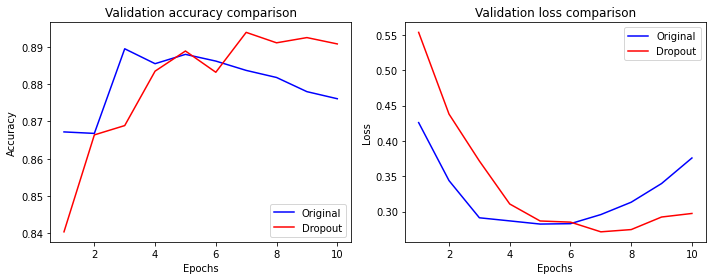

In [19]:
history_dict_drop = history_drop.history

val_acc_drop = history_dict_drop['val_accuracy']
val_acc = history_dict['val_accuracy'][:10]

val_loss_drop = history_dict_drop['val_loss']
val_loss = history_dict['val_loss'][:10]

epochs = range(1, len(val_acc_drop)+1)

plt.figure(figsize=(10,4)) # set the figure size

plt.subplot(1, 2, 1)  # row, column, index
plt.plot(epochs, val_acc, "b", label="Original")
plt.plot(epochs, val_acc_drop, "r", label="Dropout")
plt.title("Validation accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(epochs, val_loss, "b", label="Original")
plt.plot(epochs, val_loss_drop, "r", label="Dropout")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout() # minimize the overlap of the two figures
plt.show()

Adding the dropout can slightly increase the validation accuracy and slightly lower the validation loss as well as becoming overfit in a larger epoch number.

### Summary for Question 5:

In the current model, using **dropout method is more appropriate** to increase the validation accuracy and avoid overfit.

Using the regularization **doesnot increase the validation accuracy or decrease the loss**, if we zoom in the figure, the validation loss is **even increase** after regularization.\
**Dropout could be a more efficient** method to lower the validation loss and increase the validation accuracy than regularization from the figure above based on this model.

## Summary for this assignment:

This assignment helps us to learn the deep learning practical programming. I played with the several different model which changing the parameters in the model.\
We can change **the number of hidden layers**, **each layers number of units**, **type of loss function**, **type of activation function** and add **regularization & dropout**(not make the model **too complex** which could **cause the overfit** happens) strategies to adjust the model.\
All the **hyperparameters** changing in this practice has one goal: make the **model has better performance on the unseen test data set**.